# Задание лабораторной работы

- Выбрать набор данных (датасет).
- Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
  - История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
  - На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
  - Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
  - Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
  - История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
- Сформировать отчет и разместить его в своем репозитории на github.

# Выполнение работы

## Текстовое описание датасета

Данный набор доступен по адресу: https://www.kaggle.com/datasets/goyalshalini93/car-data

Набор данных имеет следующие атрибуты:

- `car_ID` - порядковый номер строки
- `symboling` - обозначение
- `CarName` - марка + модель автомобиля
- `fueltype` - тип топлива
- `aspiration` - тип подачи воздуха в двигатель (атмосферный/турбированный)
- `doornumber` - число дверей
- `carbody` - тип кузова
- `drivewheel` - привод
- `enginelocation` - расположение двигателя
- `wheelbase` - длина колесной базы
- `carlength` - длина автомобиля
- `carwidth` - ширина автомобиля
- `carheight` - высота автомобиля
- `curbweight` - снаряженная масса
- `enginetype` - тип двигателя
- `cylindernumber` - число цилиндров
- `enginesize` - объем двигателя
- `fuelsystem` - тип топливной системы
- `boreratio` - интерес для покупателя
- `stroke` - поршни
- `compressionratio` - компрессия
- `horsepower` - лошадиные силы
- `peakrpm` - обороты в минуты, при которых достигается максимальный момент
- `citympg` - расход топлива по городу
- `highwaympg` - расход по трассе
- `price` - цена

## Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline
sns.set(style="ticks")

## Подключение Google Диска для работы с Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Чтение данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/BMSTU/mmo/car.csv')

In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.shape

(205, 26)

Набор содержит как категориальные признаки, так и числовые.

## История о данных

Возьмем признаки: `carbody` (категориальный), `horsepower` (числовой) и `price` (числовой). По методологии `data_to_viz` построим `Scatter Plot` (Точечный график), `2D Density` (Двумерное распределение), `Box Plot` (Ящик с усами), `Violin Plot` и `Correlogram`.

In [ ]:
x = data["price"]
y = data["horsepower"]
z = data["carbody"]
d = data[["price", "horsepower", "carbody"]]

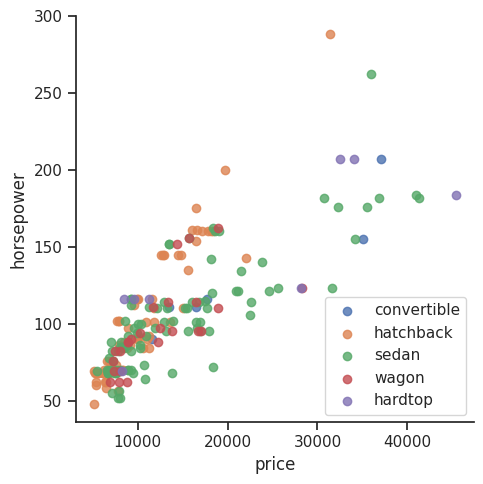

In [ ]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="price", y="horsepower", data=d, fit_reg=False, hue="carbody", legend=False)

# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

Точечный график (`Scatter Plot`) показывает зависимость между двумя числовыми признаками - `horsepower` и `price`. По графику можно сделать вывод о том, что в среднем чем выше мощность автомобиля, тем выше и его стоимость. Цветными метками отображены распределение по `carbody`.

<ipython-input-86-6a152a39b4e2>:18: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde(a)


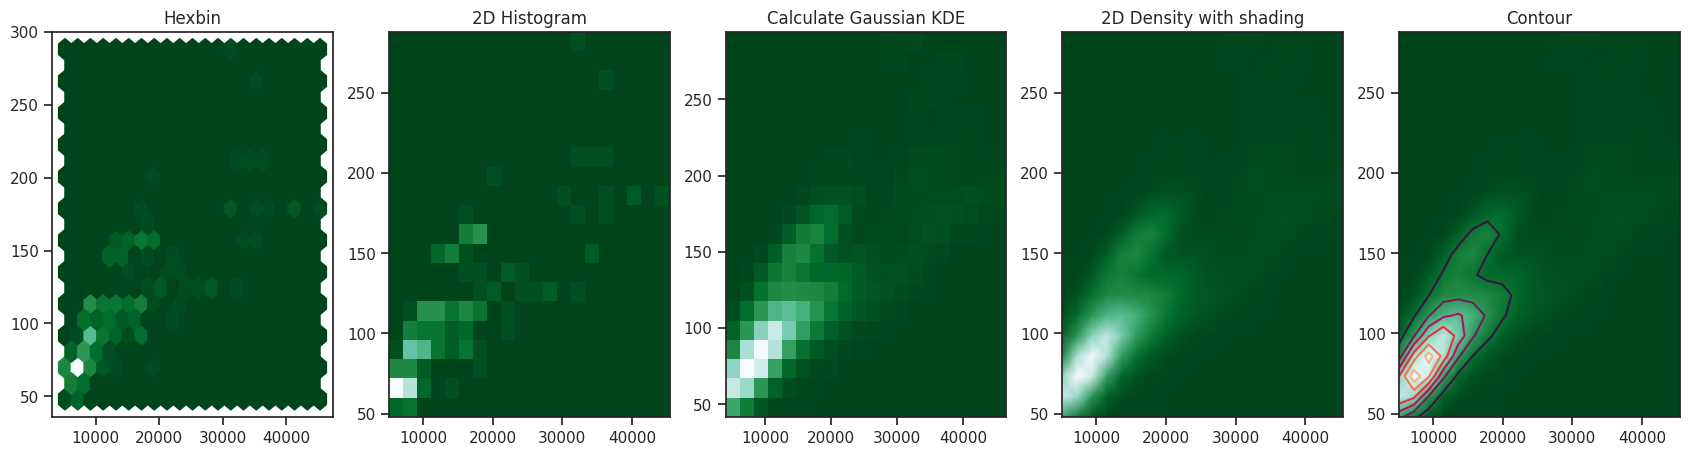

In [ ]:
from scipy.stats import kde

a = x, y

# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(21, 5))

# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[0].set_title('Hexbin')
axes[0].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)

# 2D Histogram
axes[1].set_title('2D Histogram')
axes[1].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(a)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# plot a density
axes[2].set_title('Calculate Gaussian KDE')
axes[2].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.BuGn_r)

# add shading
axes[3].set_title('2D Density with shading')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)

# contour
axes[4].set_title('Contour')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[4].contour(xi, yi, zi.reshape(xi.shape) )

Двумерное распределение по признакам `price` и `horsepower` показывает в цветном эквиваленте где больше всего есть значений данных. Чем ярче область, тем больше значений. По графикам видно, что наибольшее сосредоточенность данных присутствует в ценовом диапазоне до 20 000 и мощности до 120 л.с.

<Axes: xlabel='carbody', ylabel='price'>

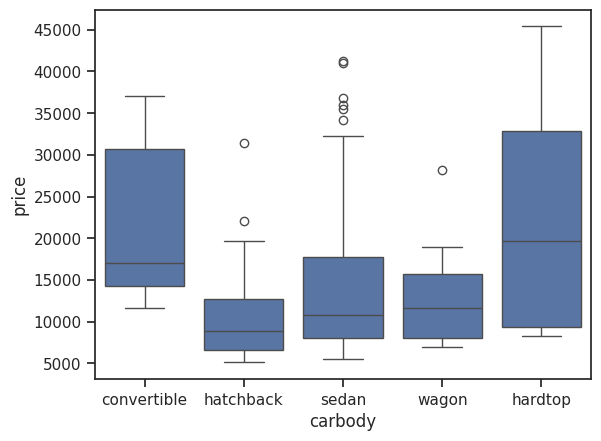

In [ ]:
sns.boxplot( x=z, y=x )

График "Ящик с усами" показывает распределение автомобилей по кузовам в рамках ценовых диапазонов. По графикам видно, что "хэтбеки" в основной массе недорогие по отношению к другим типам кузовов. "Купе" и "кабриолеты" - одни из самых дорогих типов автомобилей, причём "купе" располагаются в большом ценовом диапазоне - от 10 000 до 35 000.

<Axes: xlabel='carbody', ylabel='horsepower'>

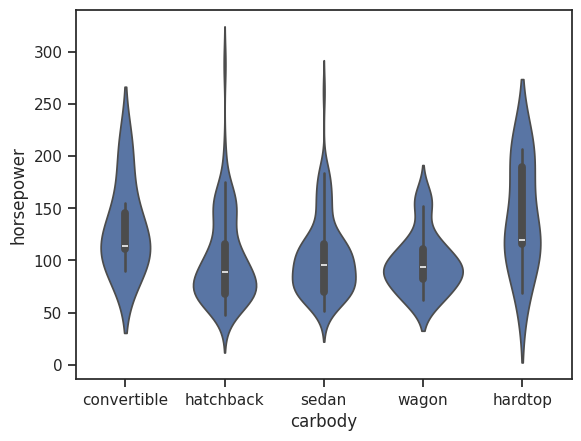

In [ ]:
sns.violinplot(x=z, y=y)

Violin Plot также показывает распределение по кузовам автомобилей, как и Box Plot. Только в качестве второго признака был выбран признак `horsepower` вместо `price`. По графику видно, что отностельно скромная мощность наблюдается у "хэтчбеков", а наиболее мощные - "купе".

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


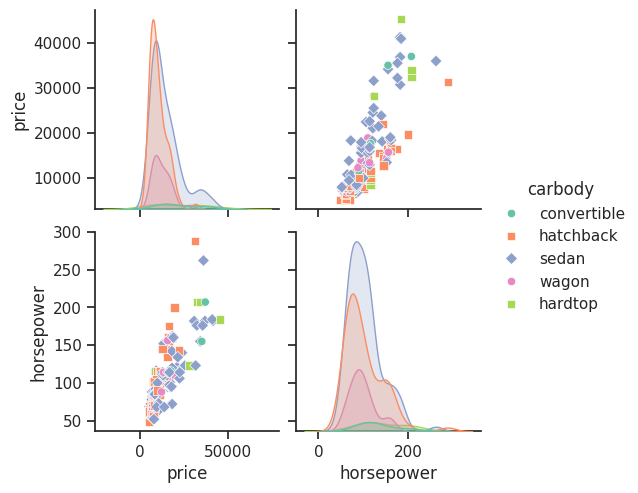

In [ ]:
sns.pairplot(d, kind="scatter", hue="carbody", markers=["o", "s", "D"], palette="Set2")
plt.show()

Парные диаграммы (`Correlogram`) показывают зависимости между двумя признаками на совокупности различных диаграмм. Зависимость мощности от цены совпадает с предыдущими выводами.